In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm,model_selection,metrics,feature_extraction
%matplotlib inline

In [2]:
data=pd.read_csv("spam.csv")

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [6]:
data.shape

(5572, 5)

In [7]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

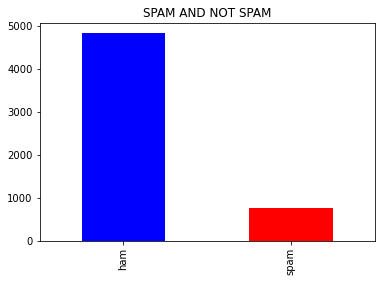

In [8]:
count_class=pd.value_counts(data['v1'],sort=True)
count_class.plot(kind='bar',color=['blue','red'])
plt.title('SPAM AND NOT SPAM')
plt.show()

<AxesSubplot:ylabel='v1'>

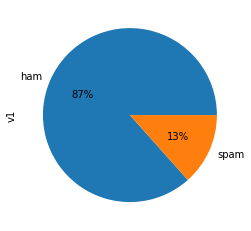

In [9]:
count_class.plot(kind='pie',autopct='%1.0f%%')

In [10]:
from collections import Counter

c1=Counter(" ".join(data[data['v1']=='ham']['v2']).split()).most_common(20)
d1=pd.DataFrame.from_dict(c1)
d1=d1.rename(columns={0:'words in ham',1:"count"})


c2=Counter(" ".join(data[data['v1']=='spam']['v2']).split()).most_common(20)
d2=pd.DataFrame.from_dict(c2)
d2=d2.rename(columns={0:'words in spam',1:'count'})

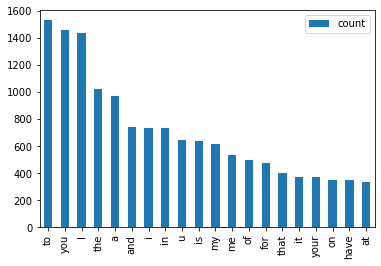

In [11]:
d1.plot(kind='bar')
y_pos=np.arange(len(d1['words in ham']))
plt.xticks(y_pos,d1['words in ham'])
plt.show()

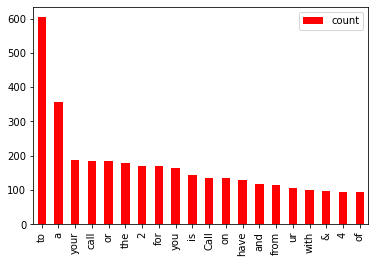

In [12]:
d2.plot(kind='bar',color='red')
y_pos=np.arange(len(d2['words in spam']))
plt.xticks(y_pos,d2['words in spam'])
plt.show()

In [13]:
f=feature_extraction.text.CountVectorizer(stop_words='english')
x=f.fit_transform(data['v2'])
x.shape

(5572, 8357)

In [14]:
data['v1']=data['v1'].map({'spam':1,'ham':0})
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,data['v1'],test_size=0.3,random_state=42)
print(np.shape(x_train),np.shape(x_test))

(3900, 8357) (1672, 8357)


# MODEL BUILDING

In [20]:
list_C = np.arange(500, 2000, 100) 
score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    svc = svm.SVC(C=C)
    svc.fit(x_train, y_train)
    score_train[count] = svc.score(x_train, y_train)
    score_test[count]= svc.score(x_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, svc.predict(x_test))
    precision_test[count] = metrics.precision_score(y_test, svc.predict(x_test))
    count = count + 1 

# SCORES

In [21]:
matrix=np.matrix(np.c_[list_C,score_train,score_test,recall_test,precision_test])
m=pd.DataFrame(data=matrix,columns=['c','score train','score test','recall score','precision score'])
m.head(10)

,c,score train,score test,recall score,precision score
0,500.0,1.0,0.978469,0.840183,0.994595
1,600.0,1.0,0.978469,0.840183,0.994595
2,700.0,1.0,0.978469,0.840183,0.994595
3,800.0,1.0,0.978469,0.840183,0.994595
4,900.0,1.0,0.978469,0.840183,0.994595
5,1000.0,1.0,0.978469,0.840183,0.994595
6,1100.0,1.0,0.978469,0.840183,0.994595
7,1200.0,1.0,0.978469,0.840183,0.994595
8,1300.0,1.0,0.978469,0.840183,0.994595
9,1400.0,1.0,0.978469,0.840183,0.994595


In [22]:
confumatrix=metrics.confusion_matrix(y_test,svc.predict(x_test))
pd.DataFrame(data=confumatrix,columns=['predicted 0','predicted 1'],index=['actual 0','actual 1'])

,predicted 0,predicted 1
actual 0,1452,1
actual 1,35,184
